<a href="https://colab.research.google.com/github/AkiraMarques/Perceptron-dados-diabetes/blob/main/Tarefa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando biblioteca numpy e matplotlib
import numpy as np
import matplotlib.pyplot as plt

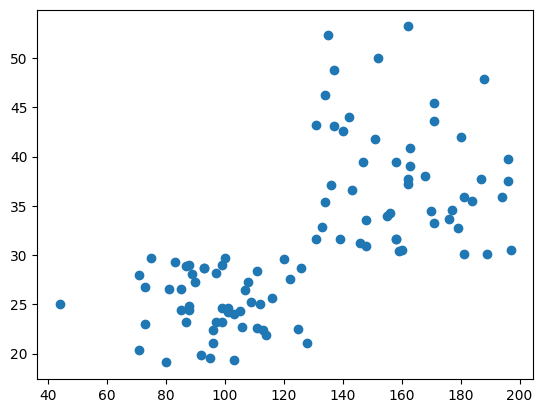

In [7]:
# Dados Diabetes simplificada

# importando dados da tabela em formato csv
arquivo = 'simple_diabetes.csv'
dados_s = np.loadtxt(arquivo, delimiter=',', skiprows=1)

# embaralhando os dados
np.random.seed(90)
np.random.shuffle(dados_s)

# Separando dados
X_s = dados_s[:, :-1]
y_s = dados_s[:, -1]

# Separando dados de treino (80%) e dados de teste (20%)
tam_treino_s = int(0.8 * len(dados_s))
X_treino_s, y_treino_s = X_s[:tam_treino_s], y_s[:tam_treino_s]
X_teste_s, y_teste_s = X_s[tam_treino_s:], y_s[tam_treino_s:]

plt.scatter(X_s[:,0],X_s[:,1])

In [9]:
# Dados diabetes completa, com 8 entradas e 700+ exemplos

# importando dados da tabela em formato url
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
dados_c = np.loadtxt(url, delimiter=',', skiprows=1)

# embaralhando os dados
np.random.seed(56)
np.random.shuffle(dados_c)

# Separando dados
X_c = dados_c[:, :-1]
y_c = dados_c[:, -1]

# Separando dados de treino (80%) e dados de teste (20%)
tam_treino_c = int(0.8 * len(dados_c))
X_treino_c, y_treino_c = X_c[:tam_treino_c], y_c[:tam_treino_c]
X_teste_c, y_teste_c = X_c[tam_treino_c:], y_c[tam_treino_c:]

In [6]:
# criando objeto perceptron e suas funções
class Perceptron:
  def __init__(self, taxa_aprendizado=0.1, epochs=10):
    self.taxa_aprendizado = taxa_aprendizado
    self.epochs = epochs
    self.w = None

  # função de fit (treino)
  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.w = np.zeros(1 + n_features) # +1 para o bias

    for epoch in range(self.epochs):
      for i in range(len(X)):
        y_previsto = self.predict(X[i])

        ajuste = self.taxa_aprendizado * (y[i] - y_previsto)
        self.w[1:] += ajuste * X[i]
        self.w[0] += ajuste
      if epoch % 100 == 0:
        print(f'Epoch {epoch}, pesos: {self.w}')

  # função predict
  def predict(self, X):
    out_lin = np.dot(X, self.w[1:]) + self.w[0]
    y_previsto = self.funcao_ativacao(out_lin)
    return y_previsto

  # função de ativação
  def funcao_ativacao(self, x):
    return np.where(x >= 0, 1, 0)

In [11]:
# criando o perceptron
perceptron = Perceptron(taxa_aprendizado=0.1, epochs=2000)

In [12]:
# Perceptron com dados Diabetes simplificada

# treinando o perceptron com os dados de entrada e saídas desejadas
perceptron.fit(X_treino_s, y_treino_s)

# testando o perceptron com os dados de teste e calculando a precisão
predicoes_s = 0
for i in range(len(X_teste_s)):
  predicao_s = perceptron.predict(X_teste_s[i])
  if predicao_s == y_teste_s[i]:
    predicoes_s += 1

acuracia_s = predicoes_s / len(X_teste_s)

print(f'Acurácia: {acuracia_s * 100:.2f}%')

# imprindo as predições
pred = 17
print(f'Dados de teste: {X_teste_s[pred], y_teste_s[pred]}')
print(f'Predições: {perceptron.predict(X_teste_s[pred])}')

Epoch 0, pesos: [-0.8  -4.5  -0.79]
Epoch 100, pesos: [-84.6    3.3  -11.83]
Epoch 200, pesos: [-165.7    -4.9    -6.47]
Epoch 300, pesos: [-245.3    -5.6    -1.21]
Epoch 400, pesos: [-295.7    2.1    1. ]
Epoch 500, pesos: [-295.7    2.1    1. ]
Epoch 600, pesos: [-295.7    2.1    1. ]
Epoch 700, pesos: [-295.7    2.1    1. ]
Epoch 800, pesos: [-295.7    2.1    1. ]
Epoch 900, pesos: [-295.7    2.1    1. ]
Epoch 1000, pesos: [-295.7    2.1    1. ]
Epoch 1100, pesos: [-295.7    2.1    1. ]
Epoch 1200, pesos: [-295.7    2.1    1. ]
Epoch 1300, pesos: [-295.7    2.1    1. ]
Epoch 1400, pesos: [-295.7    2.1    1. ]
Epoch 1500, pesos: [-295.7    2.1    1. ]
Epoch 1600, pesos: [-295.7    2.1    1. ]
Epoch 1700, pesos: [-295.7    2.1    1. ]
Epoch 1800, pesos: [-295.7    2.1    1. ]
Epoch 1900, pesos: [-295.7    2.1    1. ]
Acurácia: 100.00%
Dados de teste: (array([96. , 21.1]), 0.0)
Predições: 0


In [14]:
# Perceptron com dados Diabetes completa

# treinando o perceptron com os dados de entrada e saídas desejadas
perceptron.fit(X_treino_c, y_treino_c)

# testando o perceptron com os dados de teste e calculando a precisão
predicoes_c = 0
for i in range(len(X_teste_c)):
  predicao_c = perceptron.predict(X_teste_c[i])
  if predicao_c == y_teste_c[i]:
    predicoes_c += 1

acuracia_c = predicoes_c / len(X_teste_c)

print(f'Acurácia: {acuracia_c * 100:.2f}%')

# imprindo as predições
pred = 17
print(f'Dados de teste: {X_teste_c[pred], y_teste_c[pred]}')
print(f'Predições: {perceptron.predict(X_teste_c[pred])}')

Epoch 0, pesos: [ -2.2      8.1      6.5    -48.4     -1.1     28.1    -12.78     0.4855
   2.2   ]
Epoch 100, pesos: [-207.1     104.6       4.2     -39.9       8.2      27.      -32.01
   54.7005   -4.1   ]
Epoch 200, pesos: [-406.9      98.5       2.2     -54.1       5.5      20.8     -26.86
  106.7365    0.9   ]
Epoch 300, pesos: [-604.7      93.8      13.9     -52.3      21.1      18.8     -31.71
  155.5623   -1.1   ]
Epoch 400, pesos: [-798.9      99.        4.1     -41.5      13.7      20.2     -17.77
  201.9778   -6.3   ]
Epoch 500, pesos: [-987.5      98.       17.1     -52.7      13.5      16.1     -22.1
  249.4822    5.2   ]
Epoch 600, pesos: [-1173.        78.        10.3      -43.7       15.5       13.8
   -31.74     294.4414     8.7   ]
Epoch 700, pesos: [-1.351800e+03  8.320000e+01  1.580000e+01 -4.330000e+01  2.050000e+01
  1.920000e+01 -1.988000e+01  3.391425e+02 -8.000000e-01]
Epoch 800, pesos: [-1.527100e+03  7.890000e+01  1.190000e+01 -4.760000e+01  1.690000e+01
  2